# Welcome to the Bike sharing analysis
## <font color='teal' size='10'>'Boom Bikes'</font>
#### by:
### <font color='Green' size='5'>Sailesh Bathala</font>

Let us start by first understanding the problem statement and before that, lets understand what data we are having to further our analysis.

### Step 1: Reading the data and understanding it:

Let us first and foremost Import all the necessary libraries.
We will add them one by one as the need arises.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

We can stop the warnings by using the following command:

In [2]:
import warnings
warnings.filterwarnings('ignore')

Let us now read the data from the given CSV

In [3]:
bike_data = pd.read_csv('day.csv')

Let us now see the data that we have

In [4]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let us now see the shape of the dataset

In [5]:
bike_data.shape

(730, 16)

Next, we describe the data to get some important info such as count, mean, median, etc.

In [6]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Now, lets fetch the info of each of the columns we have

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We see the following observations:
1. We have 0 non-null values
2. We have 4 float64 columns, 1 object column and 11 int64 columns
3. Memory usage of 91.4kB

Though we have found out that we have 0 null values, we shall veify the same findings by performing the following:

In [8]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can now conclude that we have 0 null values

We will drop <font color='red'>'instant'</font> column as it just represents the index of of the dataset.

In [9]:
bike_data.drop(['instant'],axis=1,inplace=True)

Let us verify if the <font color='red'>'instant'</font> column has been dropped

In [10]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Next, <font color='red'>'dteday'</font> column doesn't come of much use as it is already represented by <font color='red'>'yr'</font>, <font color='red'>'mnth'</font>, <font color='red'>'weekday'</font>. So, we decide to drop it.

In [11]:
bike_data.drop(['dteday'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


We see that now the 'dteday' has been taken off from the dataset

Next, <font color='red'>'casual'</font> and <font color='red'>'registered'</font> which add upto <font color='red'>'cnt'</font> which represents the total count, can also be removed from our consideration as it eventually gives us the same understanding as the total count and moreover, the <font color='red'>'casual'</font> and <font color='red'>'registered'</font> are not needed for our analysis.

In [12]:
bike_data.drop(['casual','registered'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Now, let us check what columns we are left with and check their info:

In [13]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Let us now replace and map certain categorical columns into some meaningful info

In [14]:
bike_data['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_data['weathersit'].replace({1:"Clear_Few_Clouds",2:"Mist_cloudy",3:"Light_rain_snow",4:'Heavy Rain_Thunderstorm'},inplace=True)
bike_data['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike_data['mnth'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)

Now lets see what our dataset looks like

In [15]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


Now that we have some more meaningful data, let us check the info of the dataset at this present juncture

In [16]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Step 2: Let us now visualize data we have

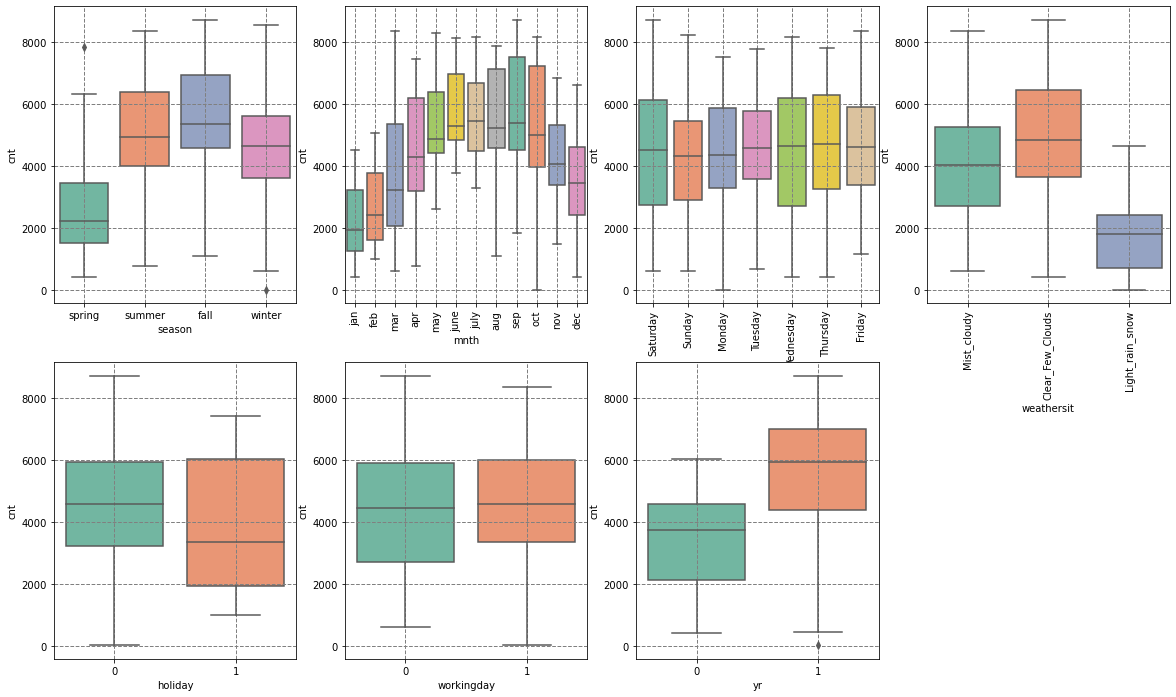

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data, palette="Set2")
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data, palette="Set2")
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.xticks(rotation = 90)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data, palette="Set2")
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.xticks(rotation = 90)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data, palette="Set2")
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.xticks(rotation = 90)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data, palette="Set2")
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data, palette="Set2")
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data, palette="Set2")
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()


The above plots gives us a rough estimate of how the ridership(cnt-target variable) was basis of the predictor variables.

Now let us see the bar plot of how the predictor variable stands out against the target variable(cnt)
<br>
1. Seasons

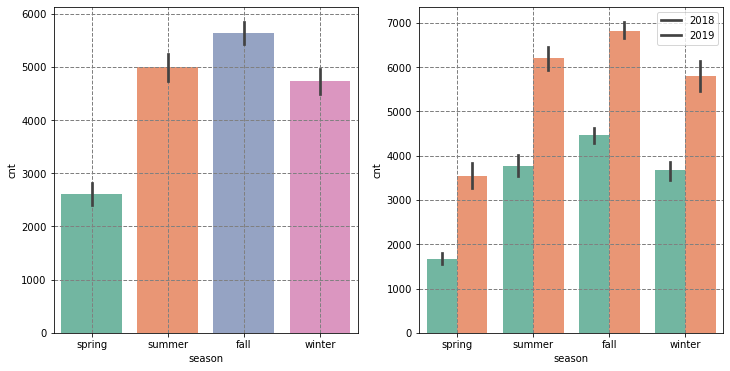

In [18]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('season','cnt',data=bike_data, palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.subplot(1,2,2)
sns.barplot('season','cnt',data=bike_data, hue='yr',palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.legend(labels=['2018', '2019'])
plt.show()

We can observe from the above that, during 'fall' season, we have higher bookings/riderships compared to other seasons. When it comes to the years, 2019 has a very good increase in bookings/ridership when compared to 2018.
<br><br>
2. Holiday

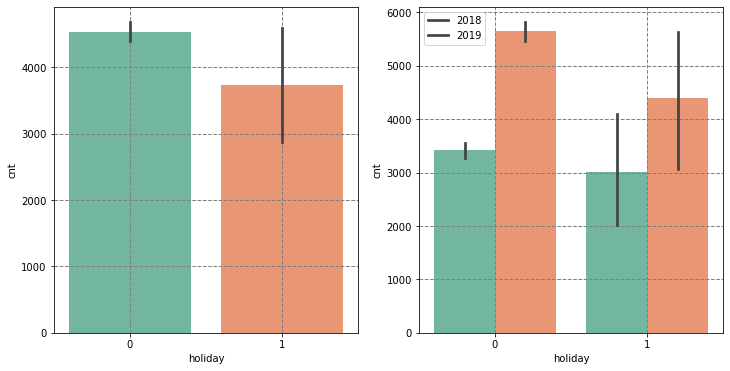

In [19]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('holiday','cnt',data=bike_data, palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.subplot(1,2,2)
sns.barplot('holiday','cnt',data=bike_data, hue='yr',palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.legend(labels=['2018', '2019'])
plt.show()

We can concur that, when it is a holiday, the ridership is less and this could be possible that people would want to spend some time with family and also a possibility that during weekdays, people could have preferred the booking to head to work. Again, we see that in 2019, bookings have increased, possibly due to more awareness on this initiative.
<br>
<br>
3. Month

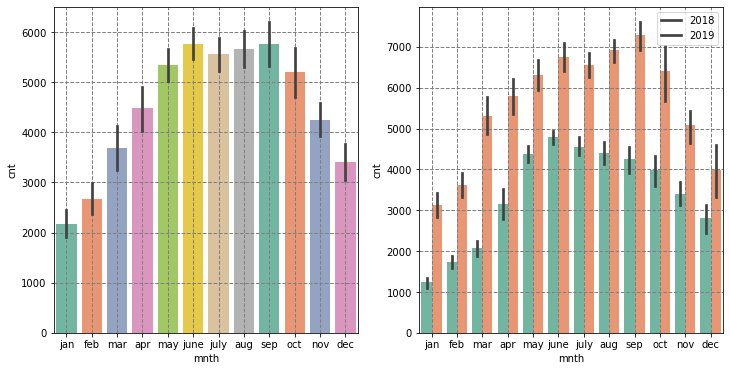

In [20]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('mnth','cnt',data=bike_data, palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.subplot(1,2,2)
sns.barplot('mnth','cnt',data=bike_data, hue='yr',palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.legend(labels=['2018', '2019'])
plt.show()

We can concur that, from May to October, the booking trend increased, mostly due to pleasant weather during that time of the year. Also, we see that this trend continues from 2018 to 2019 with much higher bookings compared to the previous year.
<br>
<br>
4. Weekday

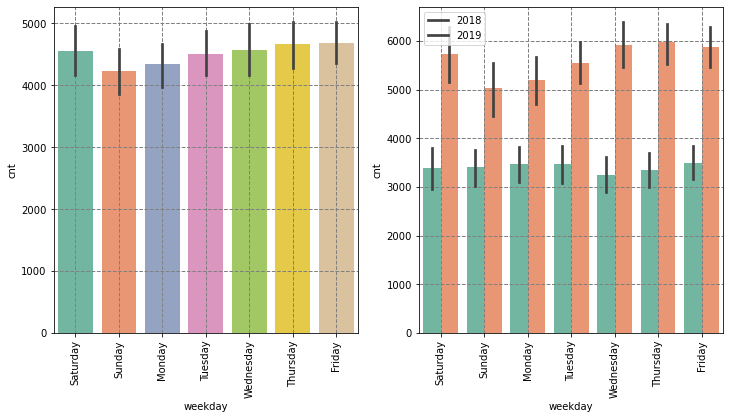

In [21]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('weekday','cnt',data=bike_data, palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot('weekday','cnt',data=bike_data, hue='yr',palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.xticks(rotation = 90)
plt.legend(labels=['2018', '2019'])
plt.show()

We can concur that, towards the end of the week, booking trend increases than compared to the start of the week. This similar trend is continued from 2018 to 2019 with higher bookings.
<br>
<br>
5. Weathersit

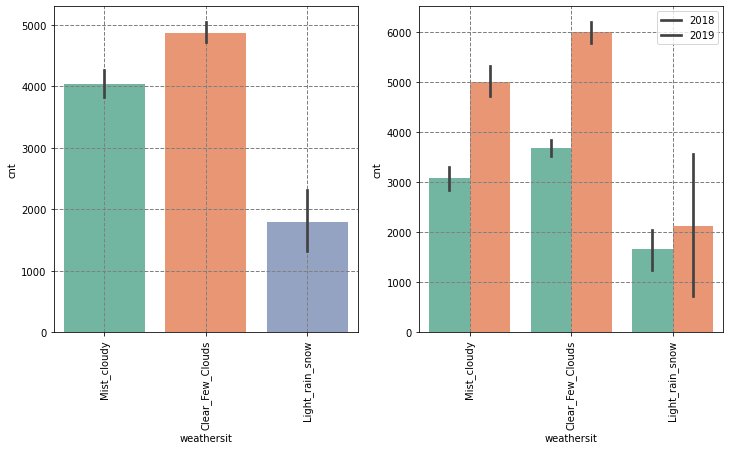

In [22]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('weathersit','cnt',data=bike_data, palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot('weathersit','cnt',data=bike_data, hue='yr',palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.xticks(rotation = 90)
plt.legend(labels=['2018', '2019'])
plt.show()

We can concur that when the weather is clear, we have more bookings, which is obvious as it is more pleasant to ride a bike during that time. Similar trend from 2018 to 2019 with higher bookings.
<br>
<br>
6. Workingday

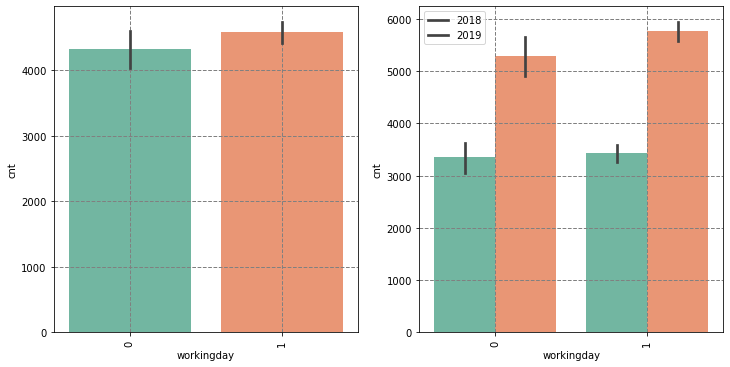

In [23]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('workingday','cnt',data=bike_data, palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot('workingday','cnt',data=bike_data, hue='yr',palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.xticks(rotation = 90)
plt.legend(labels=['2018', '2019'])
plt.show()

We can see that there isn't a significant change whether it is a working day or not. But similar trend of increase in bookings from 2018 to 2019.
<br>
<br>
We will now analyse the 'year' column.
<br>
7. Year

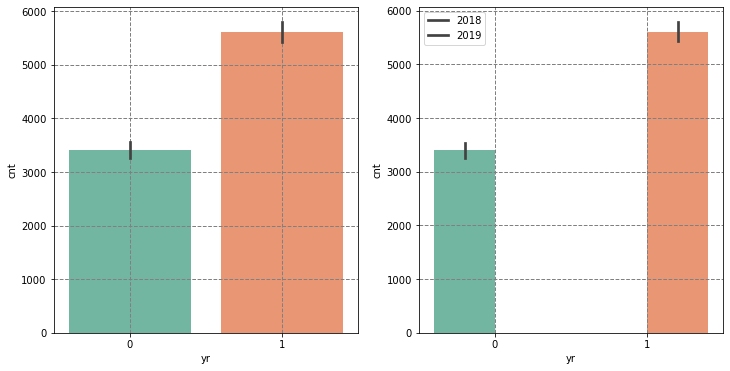

In [24]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('yr','cnt',data=bike_data, palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.subplot(1,2,2)
sns.barplot('yr','cnt',data=bike_data, hue='yr',palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.legend(labels=['2018', '2019'])
plt.show()

As we have already seen in our previous analysis of other predictor variables, it is seen that 2019 has attracted more bookings than 2018. This could be due to many factors but it is clear that the company is gaining popularity.

Now, let us perform a correlation between the following with the target variable

In [25]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


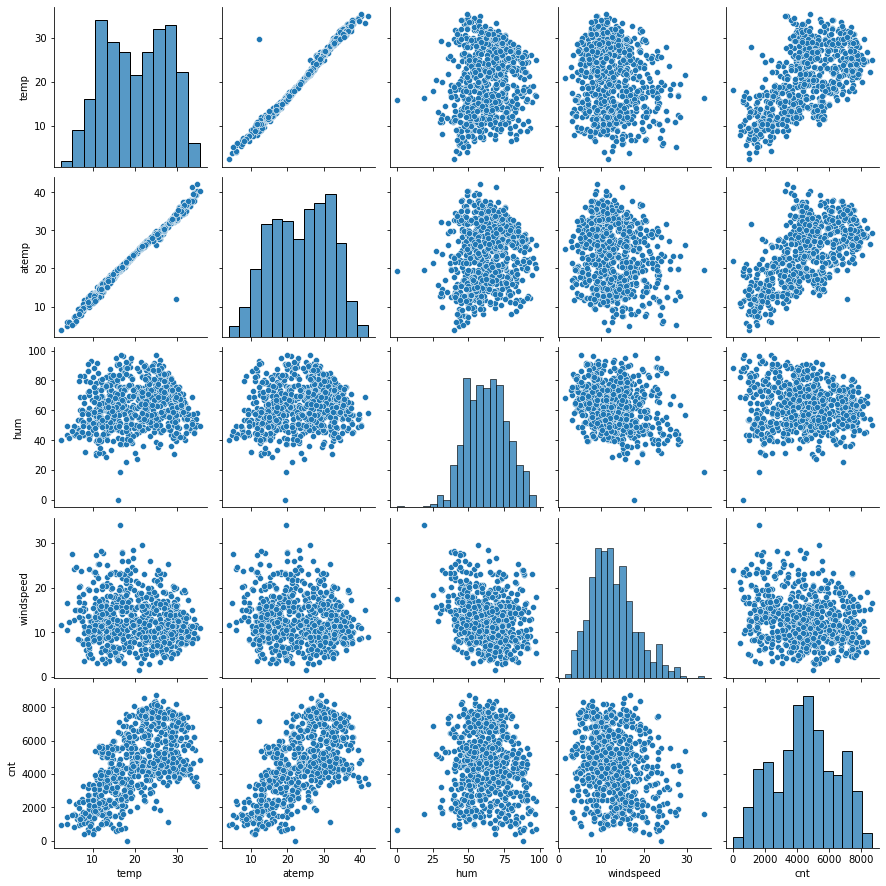

In [26]:
sns.pairplot(data=bike_data, vars=['temp','atemp','hum','windspeed','cnt'], palette='Set2')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()

We see that 'temp' and 'atemp' are very highly correlated.

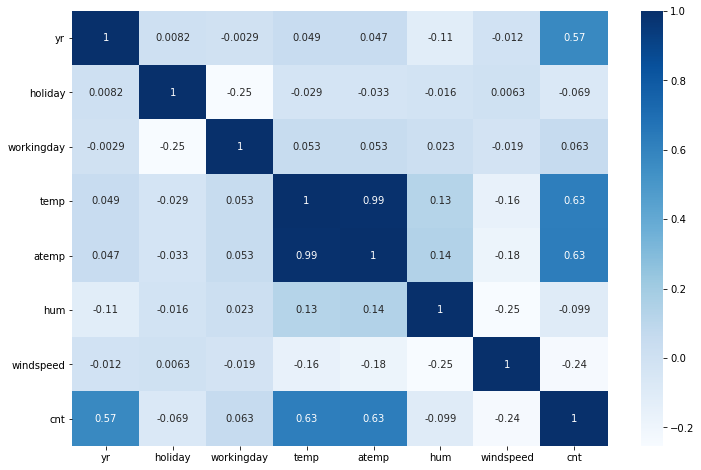

In [27]:
#let check the correlation
plt.figure(figsize = (12, 8))
sns.heatmap(bike_data.corr(), annot = True, cmap="Blues")
plt.show()

The above heat map also shows high correlation between 'temp' and 'atemp'

### 3. Preparation of Data
Let us now create dummy variable for season, weathersit, weekday and month.
<br><br>
Before that lets see what we have now in the dataset

In [28]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
months_bike=pd.get_dummies(bike_data.mnth,drop_first=True)
weathersit_bike=pd.get_dummies(bike_data.weathersit,drop_first=True)
seasons_bike=pd.get_dummies(bike_data.season,drop_first=True)
weekdays_bike=pd.get_dummies(bike_data.weekday,drop_first=True)

Let us now merge the dataset with the dummy variable

In [30]:
bike_data_new = pd.concat([bike_data,months_bike,weekdays_bike,weathersit_bike,seasons_bike],axis=1)

Lets see what we have now

In [31]:
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist_cloudy,spring,summer,winter
0,spring,0,jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,Monday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,Tuesday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,Wednesday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


Lets see the info now

In [32]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    int64  
 12  aug              730 non-null    uint8  
 13  dec              730 non-null    uint8  
 14  feb              730 non-null    uint8  
 15  jan              730 non-null    uint8  
 16  july             730 non-null    uint8  
 17  june            

Now that we have dummy variable, we can remove/drop the duplicate columns from which we created the dummy variables

In [33]:
bike_data_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

Now, lets see the dataset size

In [34]:
bike_data_new.shape

(730, 30)

Now lets see the info of the dataset

In [35]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   aug              730 non-null    uint8  
 9   dec              730 non-null    uint8  
 10  feb              730 non-null    uint8  
 11  jan              730 non-null    uint8  
 12  july             730 non-null    uint8  
 13  june             730 non-null    uint8  
 14  mar              730 non-null    uint8  
 15  may              730 non-null    uint8  
 16  nov              730 non-null    uint8  
 17  oct             

Next comes the main part where we split the dataset into Testing and training sets
### 4. Testing and Training sets

In [36]:
np.random.seed(0)
bike_data_train, bike_data_test = train_test_split(bike_data_new, train_size = 0.7, random_state = 100)

Let us now see the shape of the training and testing sets

In [37]:
bike_data_train.shape

(510, 30)

In [38]:
bike_data_test.shape

(220, 30)

Let us now see how the dataset is:

In [39]:
bike_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist_cloudy,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


Let us now rescale the features using maxminscalar()

In [40]:
m_m_scalar = MinMaxScaler()

Let us now apply scalar to all columns except for those having dummy variable and yes no values

In [41]:
req_columns = ['temp','atemp','hum','windspeed','cnt']
bike_data_train[req_columns] = m_m_scalar.fit_transform(bike_data_train[req_columns])

Now lets verify the train set after scaling

In [42]:
bike_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist_cloudy,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


let us now see what we get from the train set

In [43]:
bike_data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist_cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let us now see the correlation and see which columns are highlu correlated

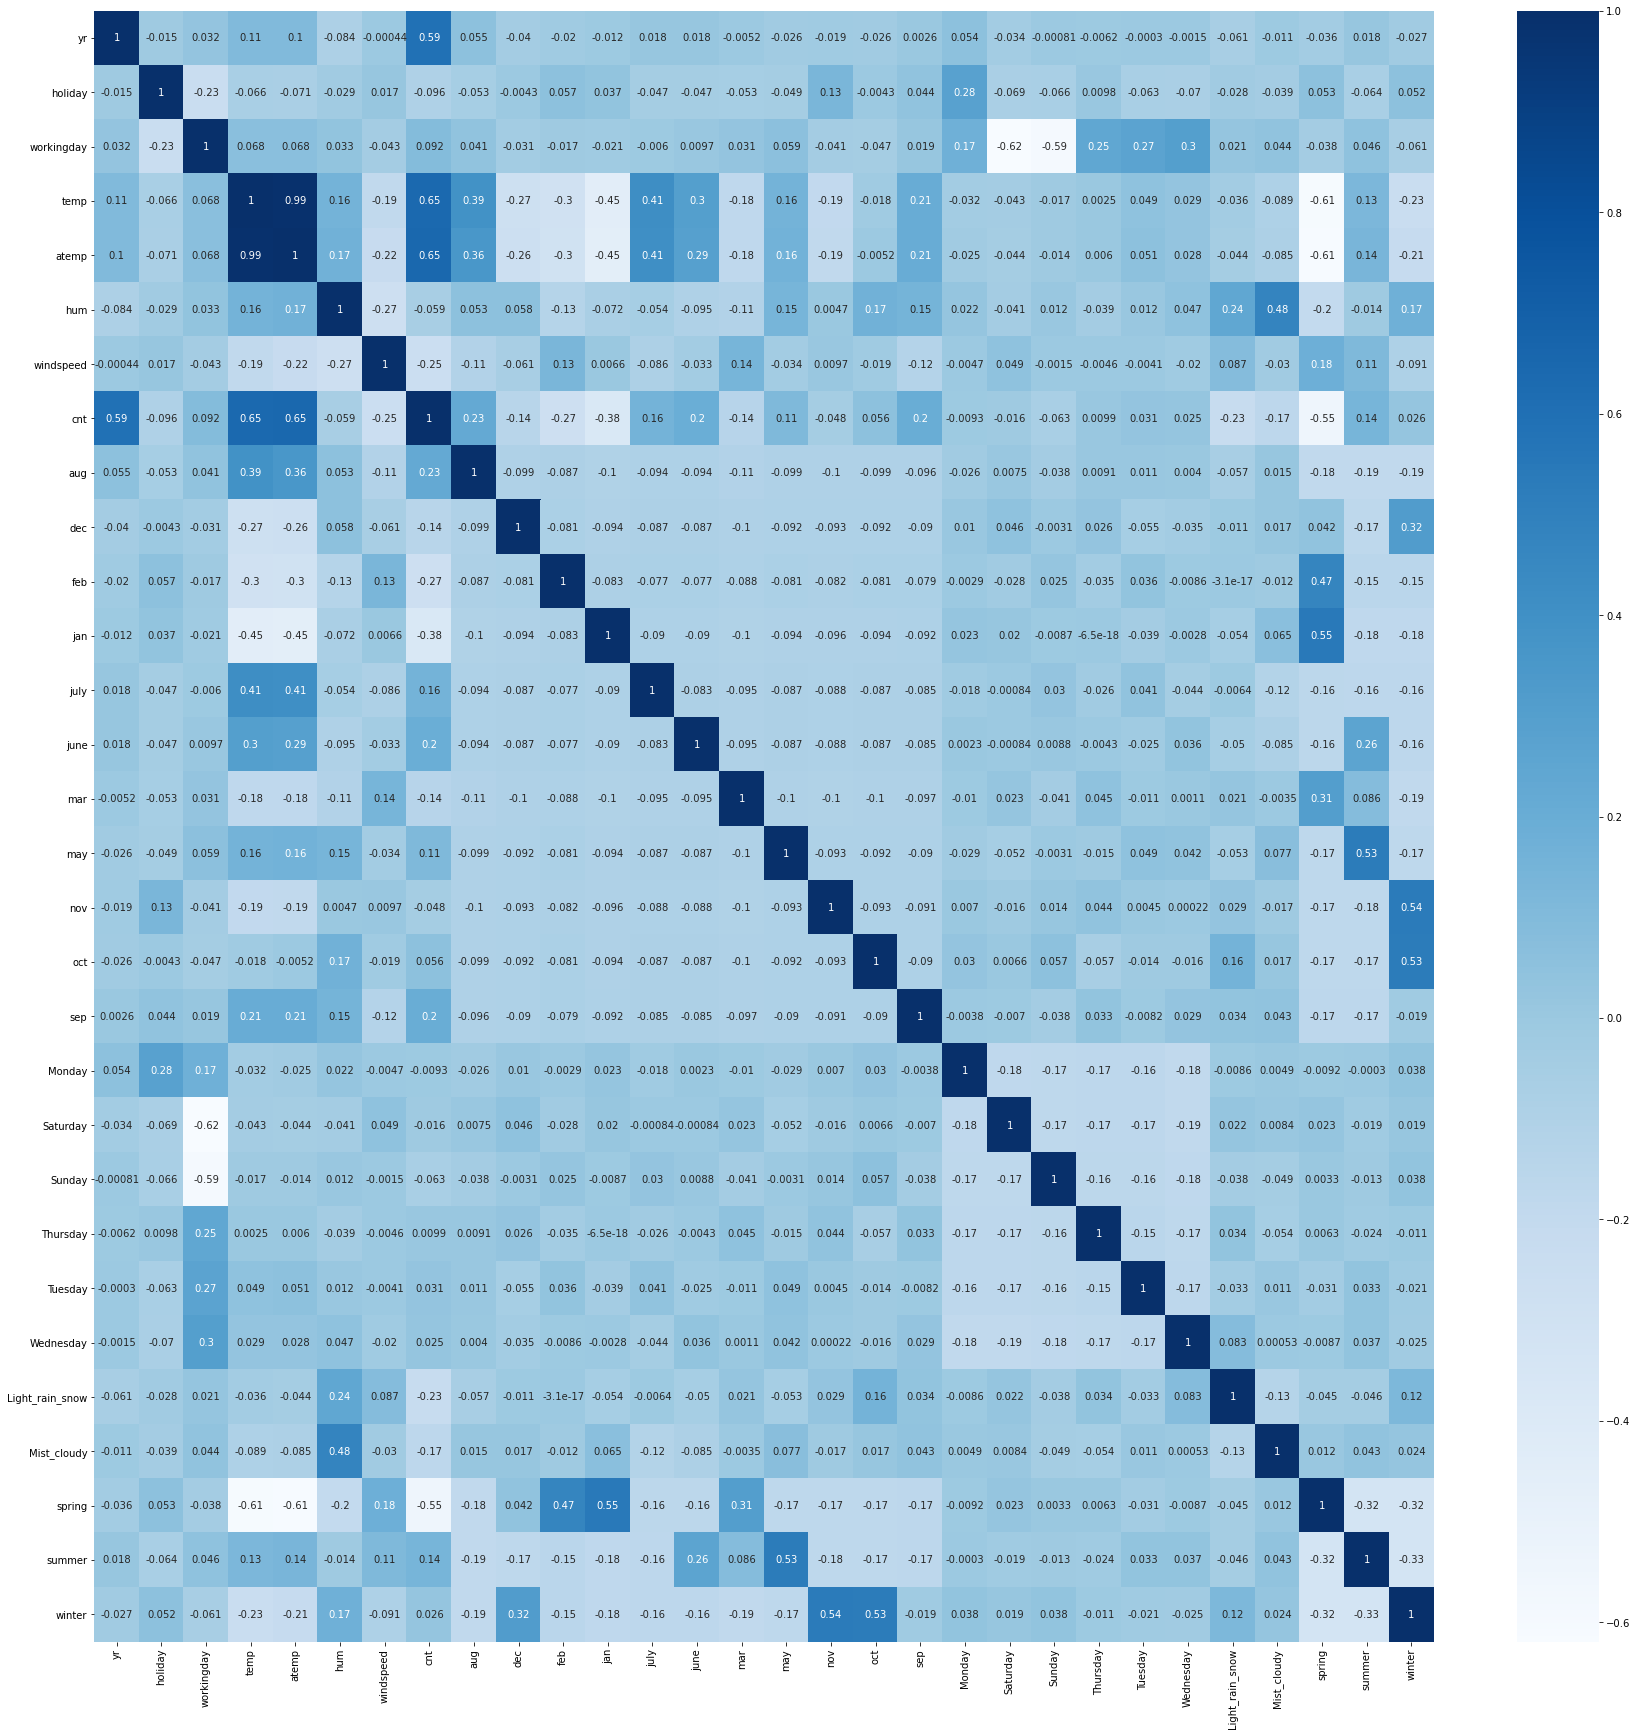

In [44]:
plt.figure(figsize = (30, 30))
sns.heatmap(bike_data_train.corr(), annot = True, cmap="Blues")
plt.show()

We see that there is high correlation between cnt and both temp & atemp. We can also see some correlation between cnt and year column. During Spring the correlation in Jan and Feb can be observed, similarly during summer we can observe correlation in May and during winters in Nov and Oct.

Let us visualize one of the correlations via scatter plot

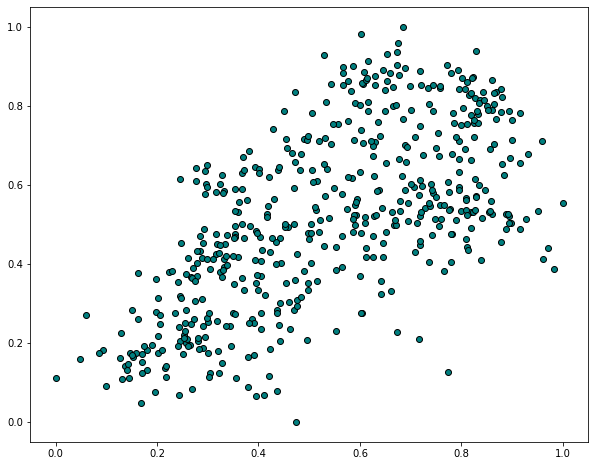

In [45]:
plt.figure(figsize=[10,8])
plt.scatter(bike_data_train.temp, bike_data_train.cnt, color='teal', edgecolor='black')
plt.show()

We can observe that there is positive correlation between 'temp' and 'cnt'

Let us now start building a Linear Model where we set 'cnt' as the target variable

In [46]:
y_train = bike_data_train.pop('cnt')
X_train = bike_data_train

We will now follow the <b>Recursive feature elimination</b> method to continue building our Linear regression Model

### 5. Recursive feature elimination

In [47]:
lm = LinearRegression()

#lets now fit the LR model
lm.fit(X_train, y_train)

#Let us consider 15 features to select
rfe = RFE(lm, 15)

rfe = rfe.fit(X_train, y_train)

Let us now list out the the columns selected in the 15 list features

In [48]:
# we perform zip function to create an object which pairs the values in each parameter passes
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('Light_rain_snow', True, 1),
 ('Mist_cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

Now let us select the columns that had a support value as true(selected by the LR model)

In [49]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'Saturday', 'Light_rain_snow', 'Mist_cloudy', 'spring',
       'summer', 'winter'],
      dtype='object')


Now let us see the rejected columns

In [50]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

Let us now copy the RFE selected columns into a new variable

In [51]:
X_train_rfe = X_train[col]

Let us now calcumate the VIF of the selected features

### 6. Variance inflation factor (VIF)

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

Let us now see what is the calculated VIF

In [53]:
print(vif)

           Features    VIF
4               hum  29.37
3              temp  17.78
2        workingday   5.31
5         windspeed   4.73
12           spring   4.53
14           winter   3.46
13           summer   2.85
11      Mist_cloudy   2.29
0                yr   2.09
9          Saturday   1.98
6               jan   1.67
7              july   1.59
8               sep   1.39
10  Light_rain_snow   1.24
1           holiday   1.18


We observe that the VIF for humidity(hum) is very high

### 7. Building a Linear Model

Let us now build the 1st linear model

In [54]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          4.22e-191
Time:                        23:10:30   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036     

As humidity showed very high VIF, we can drop the same and calculate the VIF again

In [55]:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
3              temp  7.07
2        workingday  5.24
4         windspeed  4.68
11           spring  3.07
12           summer  2.34
0                yr  2.08
13           winter  1.98
8          Saturday  1.97
5               jan  1.62
6              july  1.59
10      Mist_cloudy  1.58
7               sep  1.35
1           holiday  1.17
9   Light_rain_snow  1.09


VIF values look better now, but lets reduce it further

In [56]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.60e-188
Time:                        23:10:30   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031     

Let us now drop holiday as it has very high p value

In [57]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

Let us now calculate the VIF

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
2              temp  6.82
1        workingday  4.68
3         windspeed  4.66
10           spring  2.99
11           summer  2.33
0                yr  2.08
12           winter  1.91
7          Saturday  1.84
4               jan  1.62
5              july  1.59
9       Mist_cloudy  1.58
6               sep  1.34
8   Light_rain_snow  1.09


VIF is more of less the same now and hasn't changed much. let us build the linear regression model again

In [59]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          8.68e-189
Time:                        23:10:30   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1657      0.031     

Let us now remove Jan as it has a higher p value

In [60]:
X_train_new = X_train_new.drop(['jan'], axis = 1)

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
2              temp  6.73
1        workingday  4.66
3         windspeed  4.64
9            spring  2.38
10           summer  2.32
0                yr  2.07
11           winter  1.91
6          Saturday  1.83
4              july  1.58
8       Mist_cloudy  1.57
5               sep  1.34
7   Light_rain_snow  1.08


Not much change in VIF again. Let us continue

In [62]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          7.12e-189
Time:                        23:10:30   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1492      0.031     

Let us now remove p as it still has a high p value

In [63]:
X_train_new = X_train_new.drop(['july'], axis = 1)

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
2              temp  5.48
1        workingday  4.66
3         windspeed  4.64
8            spring  2.30
0                yr  2.07
9            summer  2.00
5          Saturday  1.83
10           winter  1.76
7       Mist_cloudy  1.57
4               sep  1.23
6   Light_rain_snow  1.08


We are now nearing 5 so lets continue

In [65]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.42e-188
Time:                        23:10:30   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1406      0.031     

Let us drop spring now as it still has high p value

In [66]:
X_train_new = X_train_new.drop(['spring'], axis = 1)

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

          Features   VIF
2             temp  4.76
1       workingday  4.04
3        windspeed  3.44
0               yr  2.02
5         Saturday  1.69
8           summer  1.57
7      Mist_cloudy  1.53
9           winter  1.40
4              sep  1.20
6  Light_rain_snow  1.08


Now we have a VIF value below 5 but lets still continue

In [68]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          3.13e-188
Time:                        23:10:30   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019     

We see that now with the LR model being performed 6th time, we have a significantly now multicolinearity between the p values and the predictor values and they seem to be highly significant.


We see that the F-statistic has a valur of 253 which is higher than 1 and the prob value of 3.13e-188 which is a 0 tells us that the model is significant

Let us now check their parameteric coefficients

In [69]:
lr_6.params

const              0.075009
yr                 0.233139
workingday         0.056117
temp               0.549892
windspeed         -0.155203
sep                0.097365
Saturday           0.067500
Light_rain_snow   -0.287090
Mist_cloudy       -0.080022
summer             0.088621
winter             0.130655
dtype: float64

### 8. Residual Analysis

Let us now see the X train value after linear regression being performed 6 times

In [70]:
X_train_lm_6

,const,yr,workingday,temp,windspeed,sep,Saturday,Light_rain_snow,Mist_cloudy,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,1,1,0


Let us now use the predict function to predict the labels of the data basis of the trained model

In [71]:
y_train_pred = lr_6.predict(X_train_lm_6)

Let us now see what the error terms look like

In [72]:
error_term = y_train - y_train_pred
error_term

576    0.056217
426   -0.034011
728   -0.135916
482   -0.089597
111   -0.079667
         ...   
578    0.022521
53    -0.007242
350    0.049970
79    -0.075478
520    0.155809
Length: 510, dtype: float64

Let us now see if it follows the normal distribution or not

Text(0.5, 0, 'Error values')

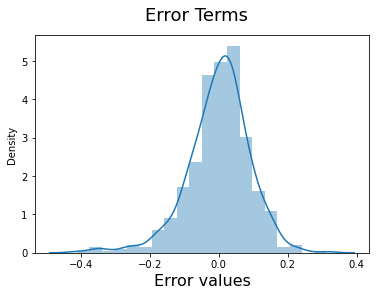

In [73]:
figs = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
figs.suptitle('Error Terms', fontsize = 18) 
plt.xlabel('Error values', fontsize = 16)
#plt.ylabel('Density', fontsize = 16)

Alas, we get to see a normal distribution curve.

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

          Features   VIF
2             temp  4.76
1       workingday  4.04
3        windspeed  3.44
0               yr  2.02
5         Saturday  1.69
8           summer  1.57
7      Mist_cloudy  1.53
9           winter  1.40
4              sep  1.20
6  Light_rain_snow  1.08


We see that the VIF value is less than 5 for all our colums

Now Lets see the heat map for the same

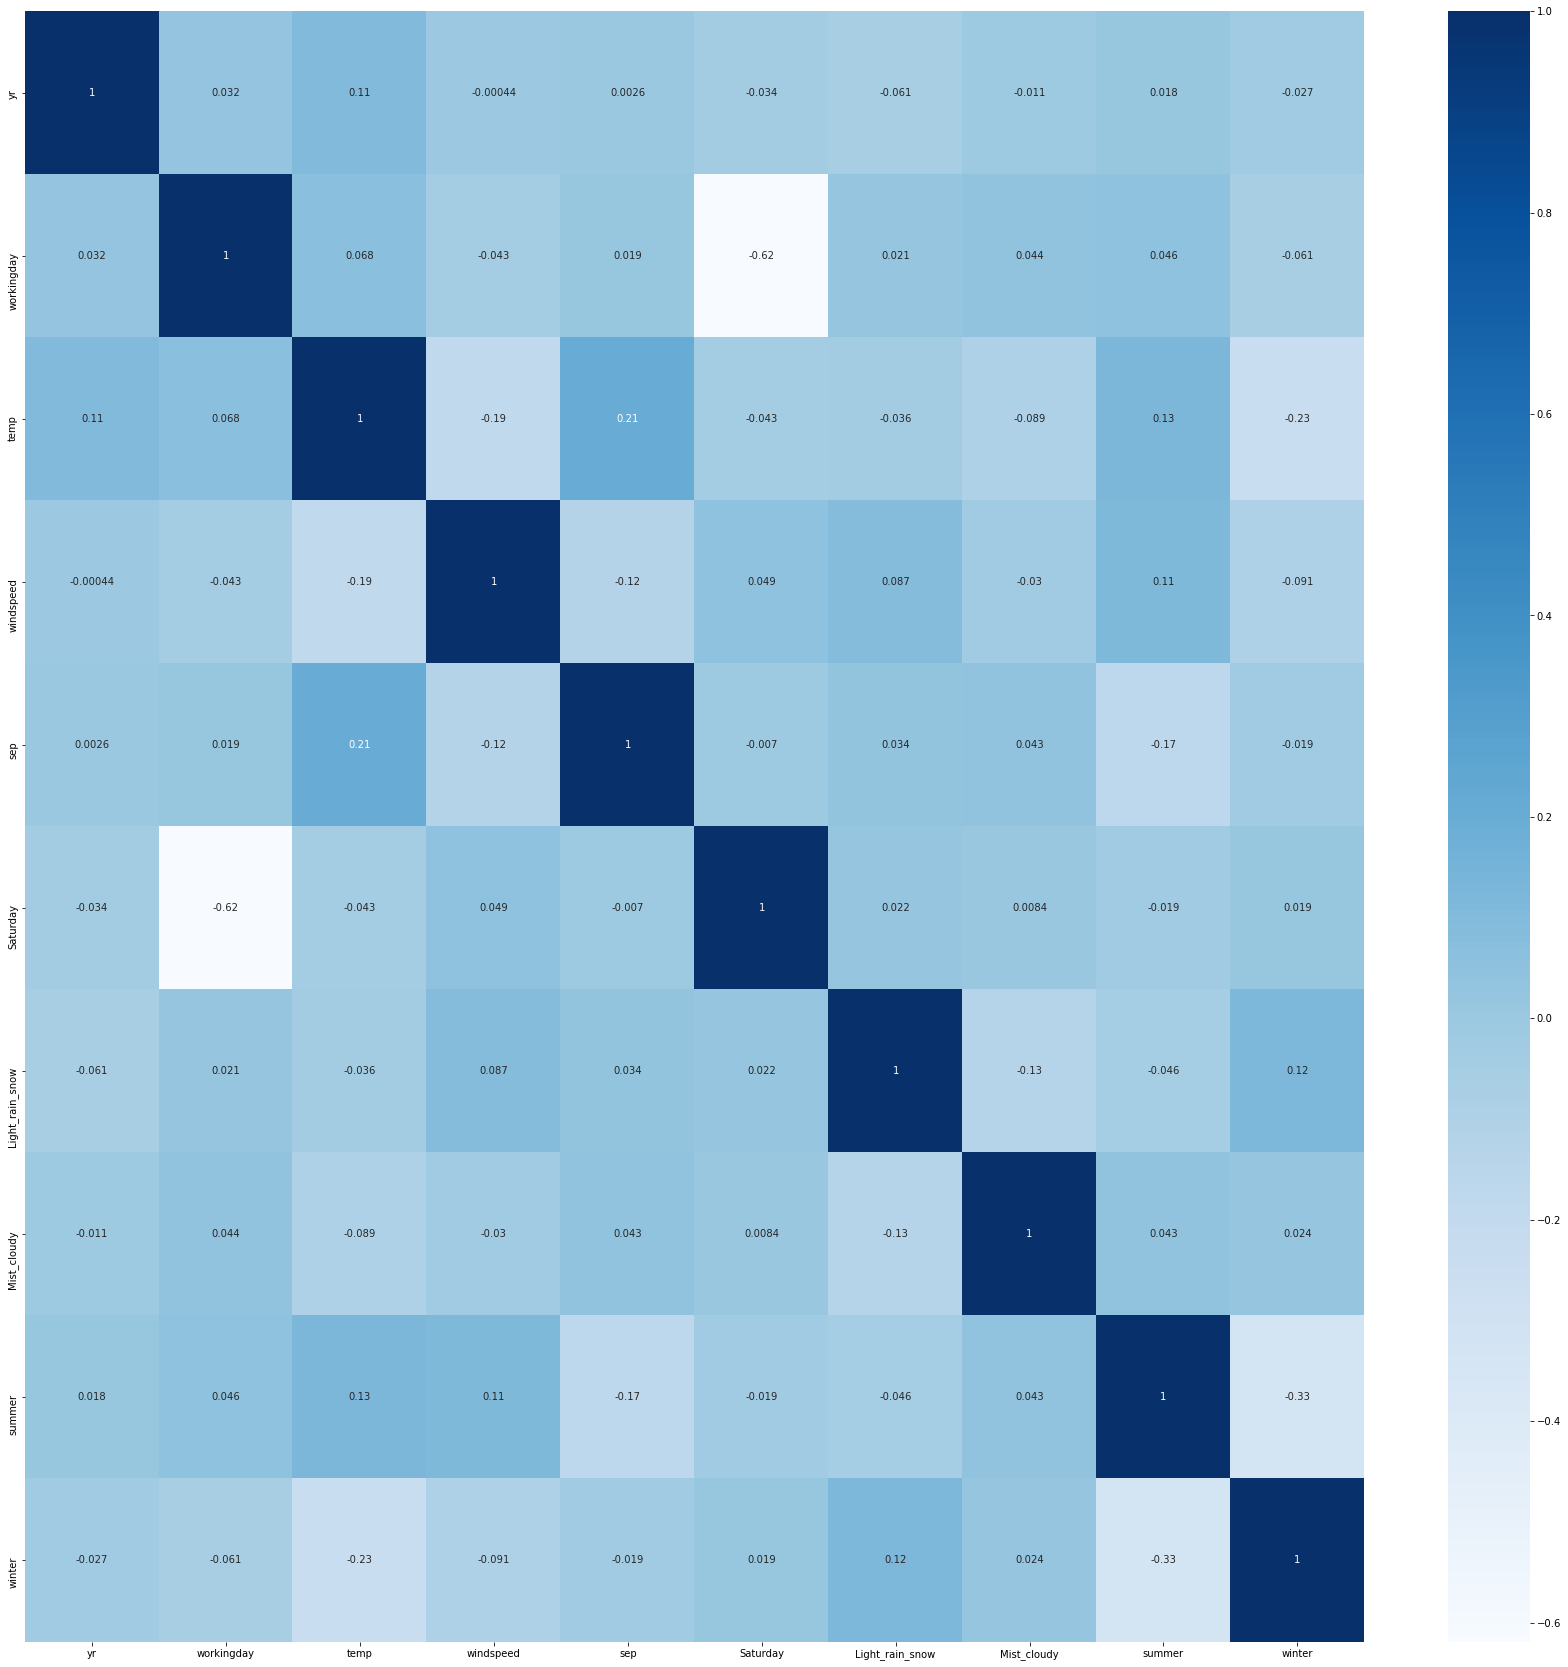

In [75]:
plt.figure(figsize = (30, 30))
sns.heatmap(X_train_new.corr(), annot = True, cmap="Blues")
plt.show()

We can observe that there is not much multicolleniarity from the above heat map

### 9. Scaling of test data based on the model

In [76]:
num_variables = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_data_test[num_variables] = m_m_scalar.transform(bike_data_test[num_variables])
bike_data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist_cloudy,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [77]:
bike_data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist_cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Lets now create the x and y sets

In [78]:
y_test = bike_data_test.pop('cnt')
X_test = bike_data_test

### 10. Calculation of Mean Squared Error

We have the 

In [79]:
X_train_latest=X_train_lm_6.drop(['const'], axis=1)

In [80]:
# X_test_new dataframe with variables from X_test

X_test_latest = X_test[X_train_latest.columns]

# Adding a constant variable 
X_test_latest = sm.add_constant(X_test_latest)

In [81]:
y_test_pred = lr_6.predict(X_test_latest)

In [82]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09872924965889021

The MSE value is calculated to be 0.098729

### 11. Calculation of R2

In [83]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [84]:
y_pred = lr_6.predict(X_test_lm_6)

In [85]:
r2 = r2_score(y_test, y_pred)
round(r2,5)

0.79614

### 12. Checking Test data vs Predicted data 

Text(0, 0.5, 'y_pred')

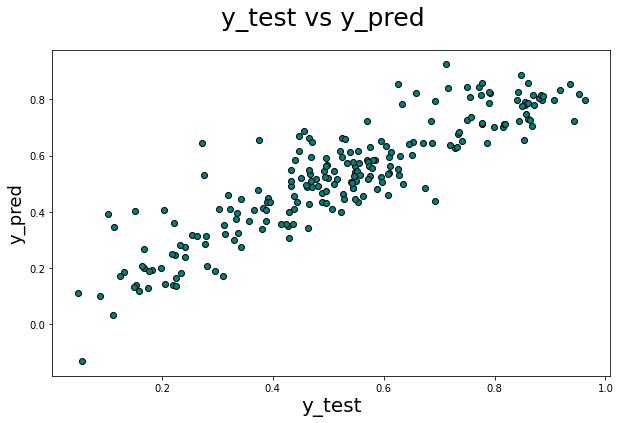

In [86]:
fig = plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred, color='teal', edgecolor='black')
fig.suptitle('y_test vs y_pred', fontsize = 25) 
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_pred', fontsize = 18) 

### 13. Equation of line

In [87]:
round(lr_6.params,3)

const              0.075
yr                 0.233
workingday         0.056
temp               0.550
windspeed         -0.155
sep                0.097
Saturday           0.068
Light_rain_snow   -0.287
Mist_cloudy       -0.080
summer             0.089
winter             0.131
dtype: float64

We can conclude that the following is the line equation

<b> cnt = 0.075 + 0.233 x yr + 0.056 x workingday + 0.550 x temp - 0.155 x windspeed + 0.097 x sep + 0.068 x Saturday -0.287 x Light_rain_snow - 0.080 x Mist_cloudy + 0.089 x summer + 0.131 x winter</b>

In [88]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          3.13e-188
Time:                        23:10:33   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019      4.031      0.000       0.038       0.112
yr                  0.2331      0.008     28.370      0.000       0.217       0.249
workingday          0.0561      0.011      5.024      0.000       0.034       0.078
temp                0.5499      0.020     27.861      0.000       0.511       0.589
windspeed          -0.1552      0.025     -6.195      0.000      -0.204      -0.106
sep                 0.0974      0.016      6.184      0.000       0.066       0.128
Saturday            0.0675      0.014      4.693      0.000       0.039       0.096
Light_rain_snow    -0.2871      0.025    -11.611      0.000      -0.336      -0.239
Mist_cloudy        -0.0800      0.009     -9.143      0.000      -0.097      -0.063
summer              0.0886      0.010      8.608      0.000       0.068       0.109
winter              0.1307      0.010     12.600      0.000       0.110       0.151
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can conclude from the above summary that the demand for bikes(bookings) are based on the following:
When there is high wind speed, misty/cloudy weather, rain/snow the ridership has been low.
But the bike ridership increases with the year, on working days, in september, during winter.